<a href="https://colab.research.google.com/github/FatimaElsaadny/NumericalOptimizationAlgorithms/blob/main/NOFML%26DS_Final_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # imports color map tools

from sklearn.metrics import r2_score
import numpy.linalg as la

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/MultipleLR.csv'

In [ ]:
data = pd.read_csv(file_path, header= None)
data.shape

(25, 4)

In [ ]:
x = np.array(data.iloc[:, : 3])
y = np.array(data.iloc[:,-1]).reshape(-1,1)
x

array([[ 73,  80,  75],
       [ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70],
       [ 53,  46,  55],
       [ 69,  74,  77],
       [ 47,  56,  60],
       [ 87,  79,  90],
       [ 79,  70,  88],
       [ 69,  70,  73],
       [ 70,  65,  74],
       [ 93,  95,  91],
       [ 79,  80,  73],
       [ 70,  73,  78],
       [ 93,  89,  96],
       [ 78,  75,  68],
       [ 81,  90,  93],
       [ 88,  92,  86],
       [ 78,  83,  77],
       [ 82,  86,  90],
       [ 86,  82,  89],
       [ 78,  83,  85],
       [ 76,  83,  71],
       [ 96,  93,  95]])

In [ ]:
ones = np.ones((x.shape[0],1 ))
x = np.concatenate((ones, x), axis= 1)
x

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

# Implement Ploting Func

In [ ]:
def lossVStheta(x,y, n):
  plt.plot(x, y,c= 'g', marker= 'o')
  plt.plot(x[-1], y[-1], c= 'r', marker= 'v')
  plt.xlabel("theta_"+str(n))
  plt.ylabel("Loss values")
  plt.title("loss vs. theta_0")
  plt.show()

In [ ]:
def lossVSiteration(x,y):
  plt.plot(x, y, marker= 'o')
  plt.xlabel("umber of iteration")
  plt.ylabel("Loss values")
  plt.title("loss vs. iterations")
  plt.show()



# Implement Adam with Batch Gradient Descent

In [ ]:
def AdamGD(x, y, epocs= 10000, alpha= 0.01, beta1= 0.2, beta2=0.2):
  iters = 0
  n_sample = len(x)

  thetas = []
  # thetas_1 = []
  loss_list = []
  hypothesis_list = []

  theta = np.array(np.zeros((x.shape[1])).reshape(-1,1))
  mt = np.array(np.zeros((x.shape[1])).reshape(-1,1))
  vt = np.array(np.zeros((x.shape[1])).reshape(-1,1))
  while(iters < epocs ):
    iters+=1
    thetas.append( theta)
   
    y_pred = x @ theta
    hypothesis_list.append(y_pred)

    z = y_pred - y
    j_cost = np.sum(z*z)/ 2*n_sample
    loss_list.append(j_cost) 
    gd_theta = (np.dot(x.T, z)/ n_sample).reshape(-1,1)

    #  Apply the stop conditions (gradient < 0.001 and cost convergence check)
    if ((iters > 2) and (np.abs(j_cost- loss_list[-2])  <= 0.3)) or (la.norm(gd_theta) < 0.001):
      return iters, thetas, loss_list, hypothesis_list, theta
      
    else:   
      mt = beta1 * mt + (1-beta1) * gd_theta
      vt = beta2 * vt + (1-beta2) * gd_theta**2
      theta = (theta - (alpha/ np.sqrt(vt+ 0.0001))* mt)
      
  return iters, thetas, loss_list, hypothesis_list, theta 


In [ ]:

iters, thetas, loss_list, hypothesis_list, theta  = AdamGD(x,y)
iters

98

# Score

In [ ]:

r2 = r2_score(y,hypothesis_list[-1])
r2


0.9780413371219793

## Loss vs. iterations

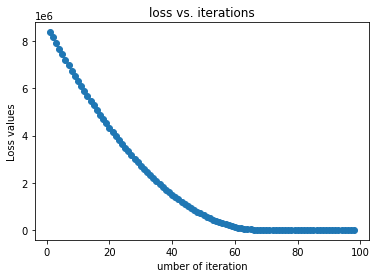

In [ ]:
lossVSiteration([i+1 for i in range(iters)], loss_list)

## Loss vs. each parameter

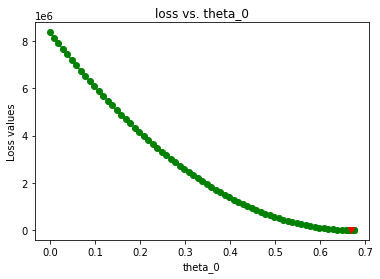

In [ ]:
theta0 = [ i[0,0] for i in thetas]
lossVStheta(theta0, loss_list, 0)

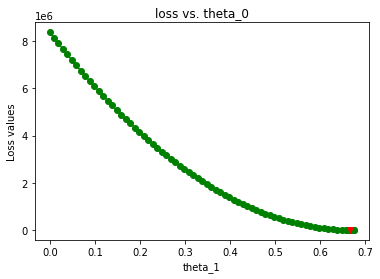

In [ ]:
theta1 = [ i[1,0] for i in thetas]
lossVStheta(theta1, loss_list, 1)

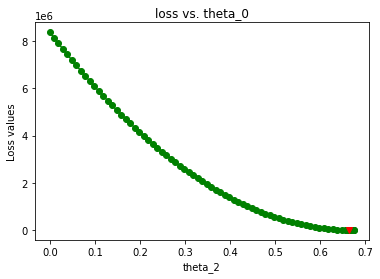

In [ ]:
theta2 = [ i[2,0] for i in thetas]
lossVStheta(theta2, loss_list, 2)

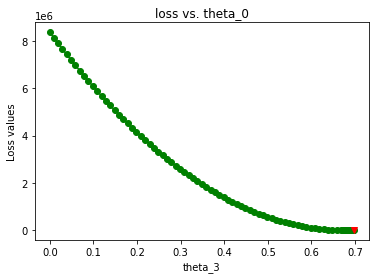

In [ ]:
theta3 = [ i[3,0] for i in thetas]
lossVStheta(theta3, loss_list, 3)

# Adam with Mini-batch

In [ ]:
def AdamMB(x, y, epocs= 10000, batch= 10, alpha= 0.01, beta1= 0.05, beta2=0.1):
  iters = 0
  n_sample = len(x)

  thetas = []
  # thetas_1 = []
  loss_list = []
  hypothesis_list = []

  theta = np.array(np.zeros((x.shape[1])).reshape(-1,1))
  mt = np.array(np.zeros((x.shape[1])).reshape(-1,1))
  vt = np.array(np.zeros((x.shape[1])).reshape(-1,1))
  print(theta.shape)
  while(iters < epocs ):
    y_pred = []
    for i in range(0, n_sample+1, batch):

      thetas.append( theta)

      xi = x[i:i+batch]
      yi = y[i:i+batch]

      yi_pred = xi @ theta
      y_pred.append(yi_pred)

      zi = yi_pred - yi
      ji_cost = np.sum(zi*zi)/ 2*batch
      loss_list.append(ji_cost)

      gd_theta = (np.dot(xi.T, zi)/ batch).reshape(-1,1)
      mt = beta1 * mt + (1-beta1) * gd_theta
      vt = beta2 * vt + (1-beta2) * gd_theta**2
      theta = theta - (alpha/ np.sqrt(vt+ 0.0001))* mt
   
    
    hypothesis_list.append(y_pred)
    iters+=1
    if (np.abs(loss_list[-1]- loss_list[-2])  <= 0.1) or (la.norm(gd_theta) < 0.001):
      return iters, thetas, loss_list, hypothesis_list, theta


  return iters, thetas, loss_list, hypothesis_list, theta 


In [ ]:
batch = 10
iters, thetas, loss_list, hypothesis_list, theta = AdamMB(x, y, batch = batch)
iters

(4, 1)


1310

# Score

In [ ]:
y_pre = np.dot(x, theta)
r2 = r2_score(y,y_pre)
r2


0.9737460139846333

## Loss vs. iterations

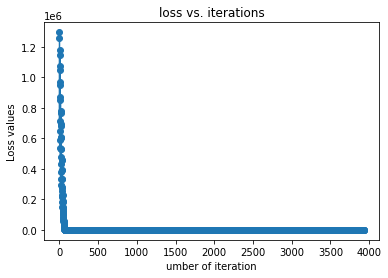

In [ ]:
allIters = iters* (int((len(x)/ 10))+1)
lossVSiteration([i+1 for i in range(allIters)],loss_list)

## Loss vs. parameters

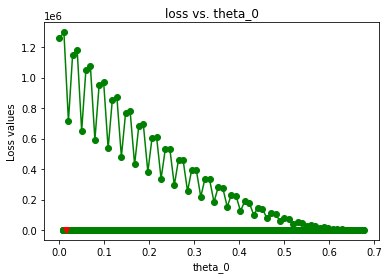

In [ ]:
theta0 = [ i[0,0] for i in thetas]
lossVStheta(theta0, loss_list, 0)

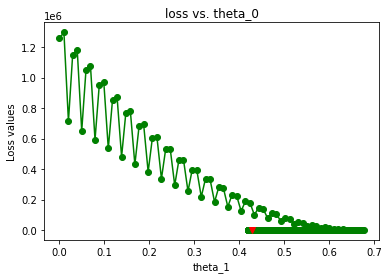

In [ ]:
theta1 = [ i[1,0] for i in thetas]
lossVStheta(theta1, loss_list, 1)

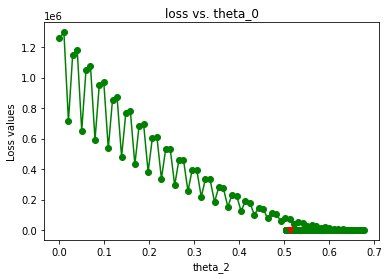

In [ ]:
theta2 = [ i[2,0] for i in thetas]
lossVStheta(theta2, loss_list, 2)

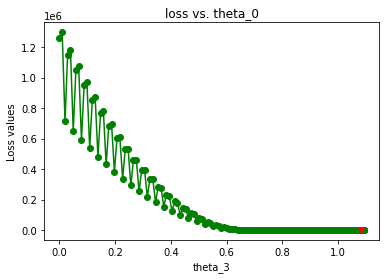

In [ ]:
theta3 = [ i[3,0] for i in thetas]
lossVStheta(theta3, loss_list, 3)